In [1]:
# Imports
import numpy as np
import os
from matplotlib import pyplot as plt
import h5py as h5
from PyXRIM.Corrections import Corrector
from PyXRIM.misc import  bin_ndarray
from functions import *
from decompFunctions import *
%matplotlib notebook

In [2]:
#Inputs
fname = 'D:\Libraries\Documents\Materials Informatics\LiCoO2_Al2O3_20160330.hdf5'
datasets = ['S026','S027','S028'] # name of raw dataset
procRefName = 'bkg_corrected' # reference name to append to rawData

In [3]:
# open h5file
f = h5.File(fname, mode='r') 
# Always open in read mode 'r'.
# Until you're ready to write into the file. This is especially true if your OS is not Unix-based like Windows.
rawg = f['20160330/Raw']
procg = f['20160330/Process']
meta = f['20160330/Meta']

In [4]:
roi1x=slice(250,640)
roi1y=slice(510,900)  #original 1024

#roi1x=slice(0,1024)
#roi1y=slice(0,1024)  #original 1024


i = 0;
for name in datasets:
    rawDset = rawg[name]
    procDset = f[rawDset.attrs['bkg_corrected']]   

    if i == 0:
        #data = procDset[:,:,:]
        data = procDset[:,roi1x,roi1y]
        datalog = procDset[:,roi1x,roi1y]+10
    
        twotheta = rawDset.attrs['delta']
        
        i = 1
    else:
        #data = np.vstack([data, procDset[:,:,:]])
        data = np.vstack([data, procDset[:,roi1x,roi1y]])
        datalog = np.vstack([datalog, procDset[:,roi1x,roi1y]+10])

        twotheta = np.hstack([twotheta,rawDset.attrs['delta']])
        

<IPython.core.display.Javascript object>


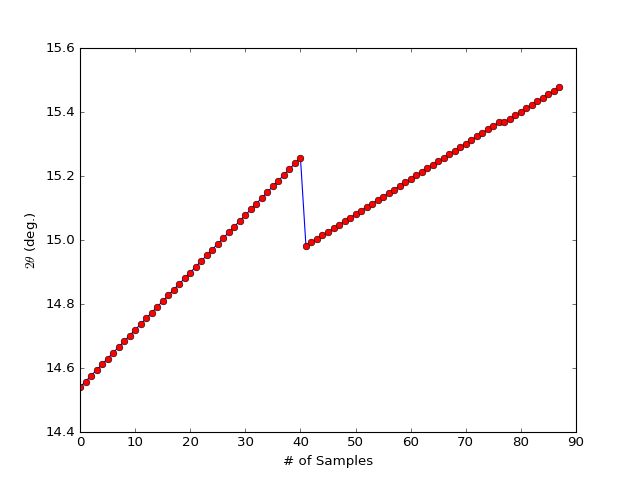

In [5]:
fig,ax = plt.subplots()
ax.plot(twotheta,marker = 'o', markerfacecolor='r')
ax.set_xlabel('# of Samples')
ax.set_ylabel('$2\\theta$ (deg.)')

<IPython.core.display.Javascript object>


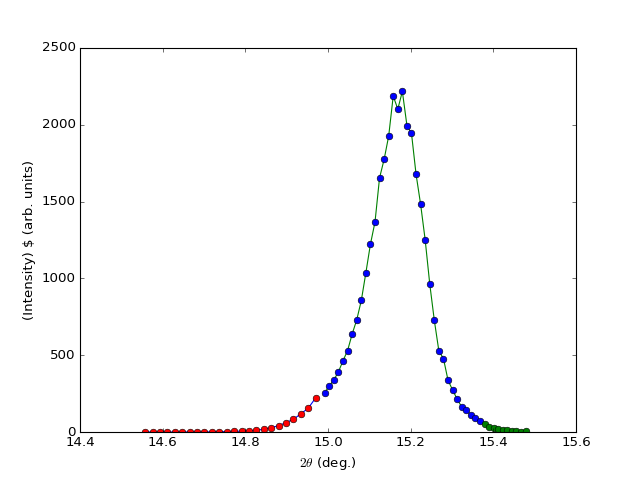

In [6]:
normInt = np.mean(data, axis = (1,2))
    
fig,ax = plt.subplots()
ax.plot(twotheta[1:25],normInt[1:25],marker = 'o', markerfacecolor='r')
ax.set_xlabel('$2\\theta$ (deg.)')
ax.set_ylabel('(Intensity) $ (arb. units)')
                               
ax.plot(twotheta[42:77],normInt[42:77],marker = 'o', markerfacecolor='b')
ax.plot(twotheta[78:88],normInt[78:88],marker = 'o', markerfacecolor='g')

In [7]:
##Insert DELETE CODE
delete = [0]

data_new = np.vstack([data[1:25,:,:],data[42:88,:,:]])
datalog_new = np.vstack([datalog[1:25,:,:],datalog[42:88,:,:]])
twotheta_new = np.hstack([twotheta[1:25],twotheta[42:88]])

print data_new.shape
print datalog_new.shape
print twotheta_new.shape

(70L, 390L, 390L)
(70L, 390L, 390L)
(70L,)


dataList = data
data2 = np.array([data2 for data2 in dataList])
qsize = sum([l.shape[0] for l in dataList])
xsize, ysize = dataList[0].shape[1], dataList[0].shape[-1]
print data2.shape
print qsize
print ysize
print xsize
data2 = data2.reshape(qsize, ysize, xsize)

<IPython.core.display.Javascript object>


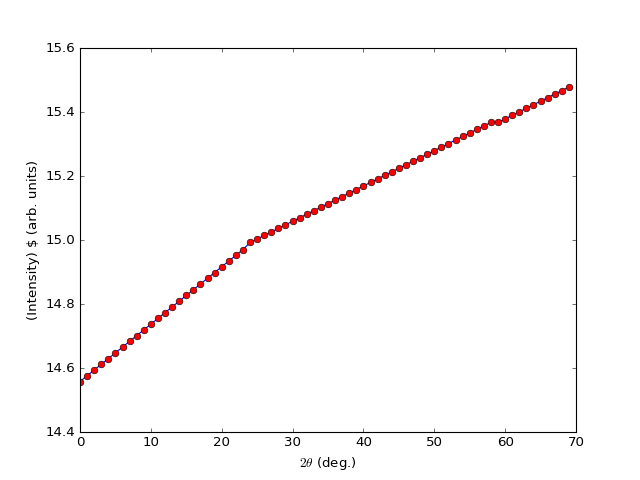

In [8]:
fig,ax = plt.subplots()
ax.plot(twotheta_new,marker = 'o', markerfacecolor='r')
ax.set_xlabel('$2\\theta$ (deg.)')
ax.set_ylabel('(Intensity) $ (arb. units)')

<IPython.core.display.Javascript object>


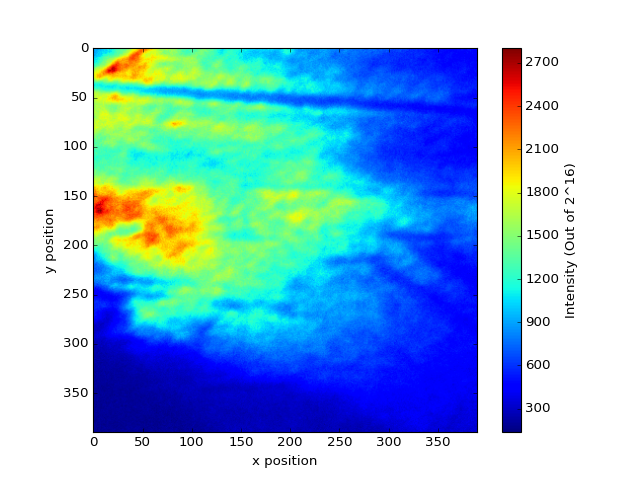

In [9]:
fig,ax = plt.subplots()
cax = ax.imshow(data[30,:,:])
cbar = fig.colorbar(cax)
cbar.set_label('Intensity (Out of 2^16)')
ax.set_xlabel('x position')
ax.set_ylabel('y position')


In [10]:
# PCA
xvals= twotheta_new
# You should do one PCA with logscaling = True and another with logscaling = False to compare.
data_prep = preping(data_new, logscaling = False, feature_scaling=False, feature_range=(0.1,1))
datalog_prep = preping(datalog_new, logscaling = True, feature_scaling=False, feature_range=(0.1,1))


<IPython.core.display.Javascript object>


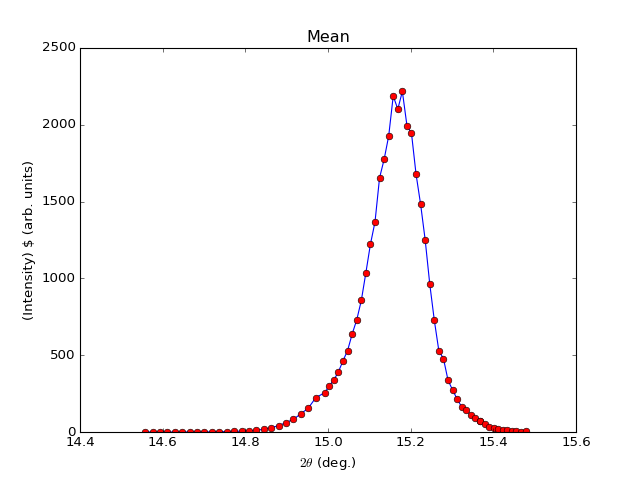

<IPython.core.display.Javascript object>


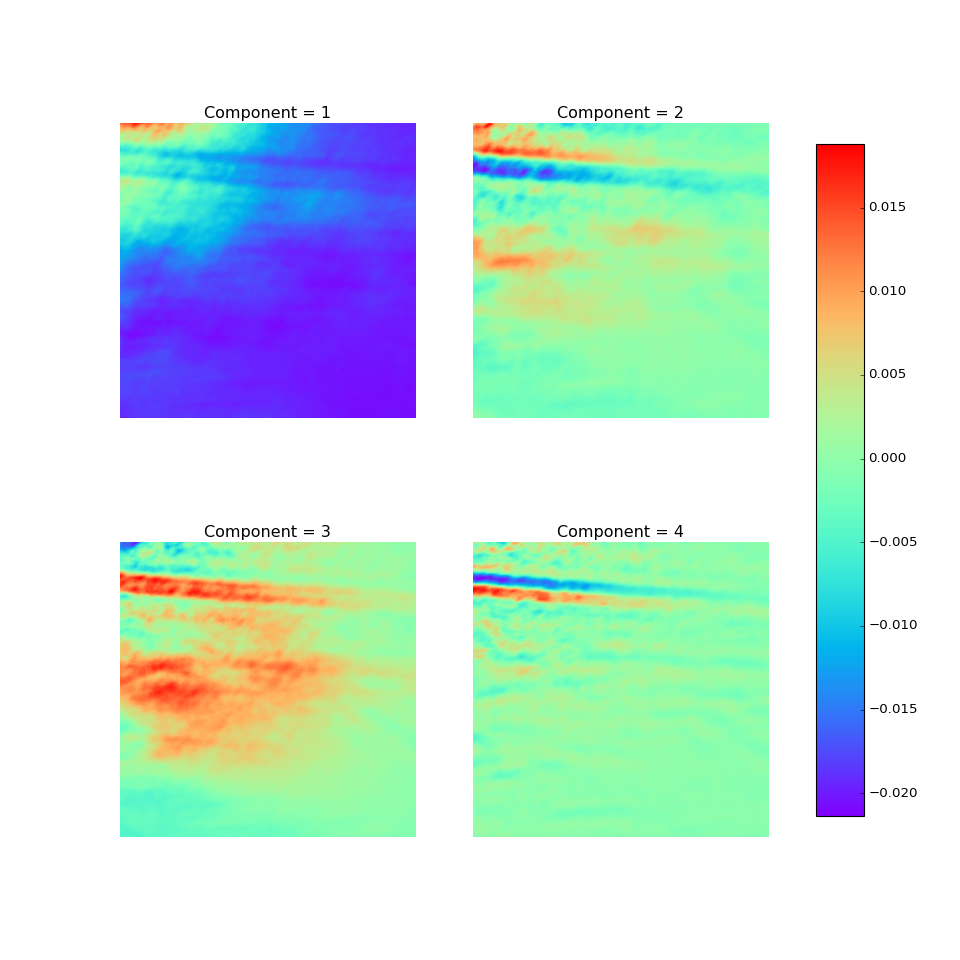

<IPython.core.display.Javascript object>


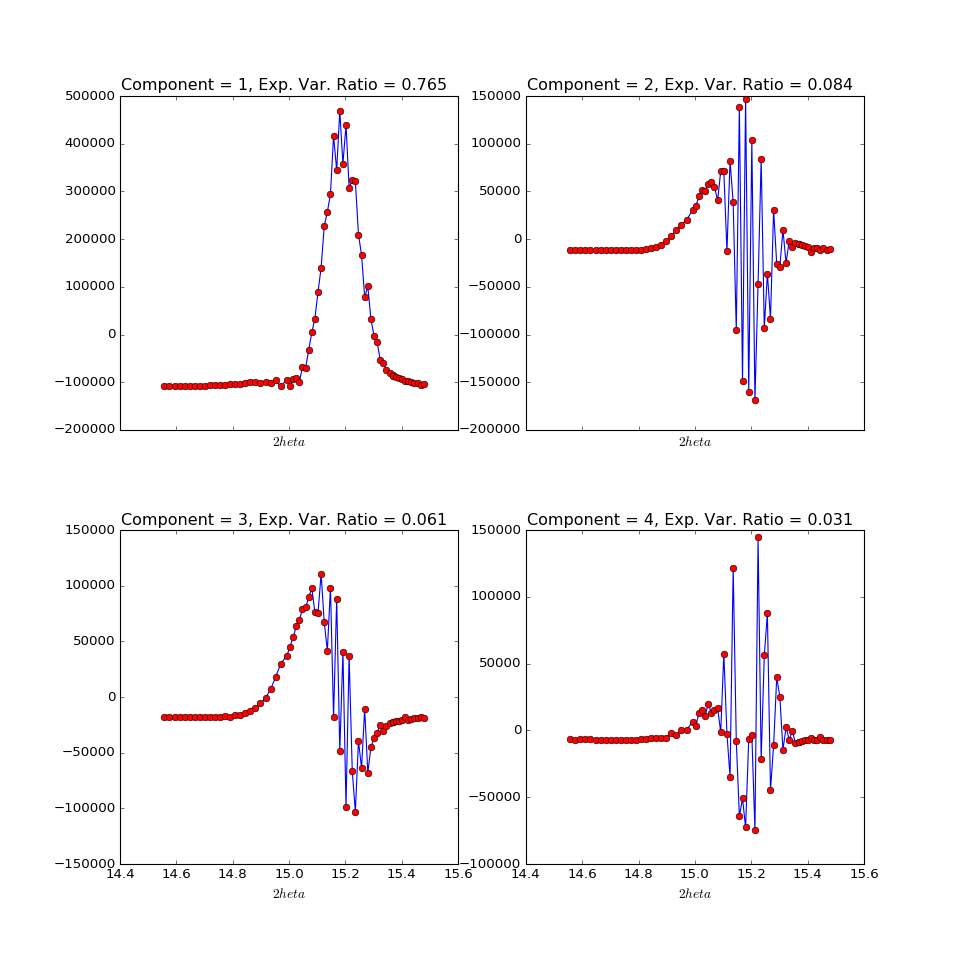

In [11]:
# set the number of principal components we want PCA to use. Try multiple numbers.
n_comp = 4
r_comp = 20
#projec, eigenvec, var_ratio, pca = doPCA(data2, n_comp, xvals=xvals,xlabel='$2\theta$',cmap='rainbow')
projec, eigenvec, var_ratio, pca = doPCA(data_prep, n_comp,xvals=xvals,xlabel='$2\theta$',
                                         cmap='rainbow',normalize = True, returnComponents = r_comp)

#Take the mean on the other dimension.  Mean is just a vector of 70
#When you are taking the slice, the mean has to look smooth with no noise.  Try it with all the data except for the probe.

<IPython.core.display.Javascript object>


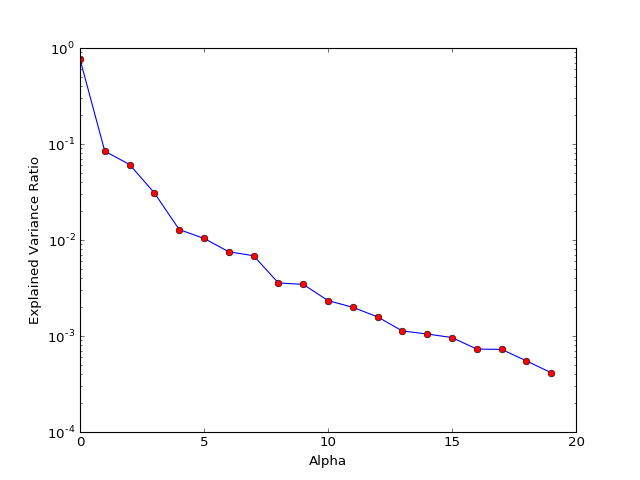

In [12]:
v = var_ratio[0]
for i in range(1,var_ratio.shape[0]):
    v = np.hstack([v,var_ratio[i]])

fig,ax = plt.subplots()
ax.plot(v,marker = 'o', markerfacecolor='r')
ax.set_xlabel('Alpha')
ax.set_xlim([0,20])
ax.set_ylabel('Explained Variance Ratio')
ax.set_ylim([0.0001,1])
ax.set_yscale("log", nonposy='clip')

<IPython.core.display.Javascript object>


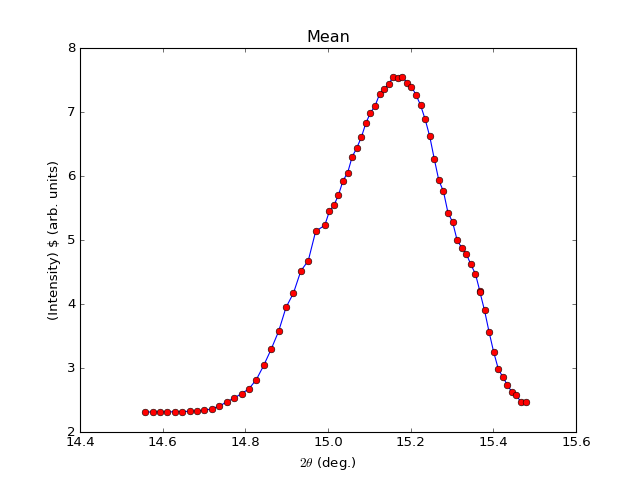

<IPython.core.display.Javascript object>


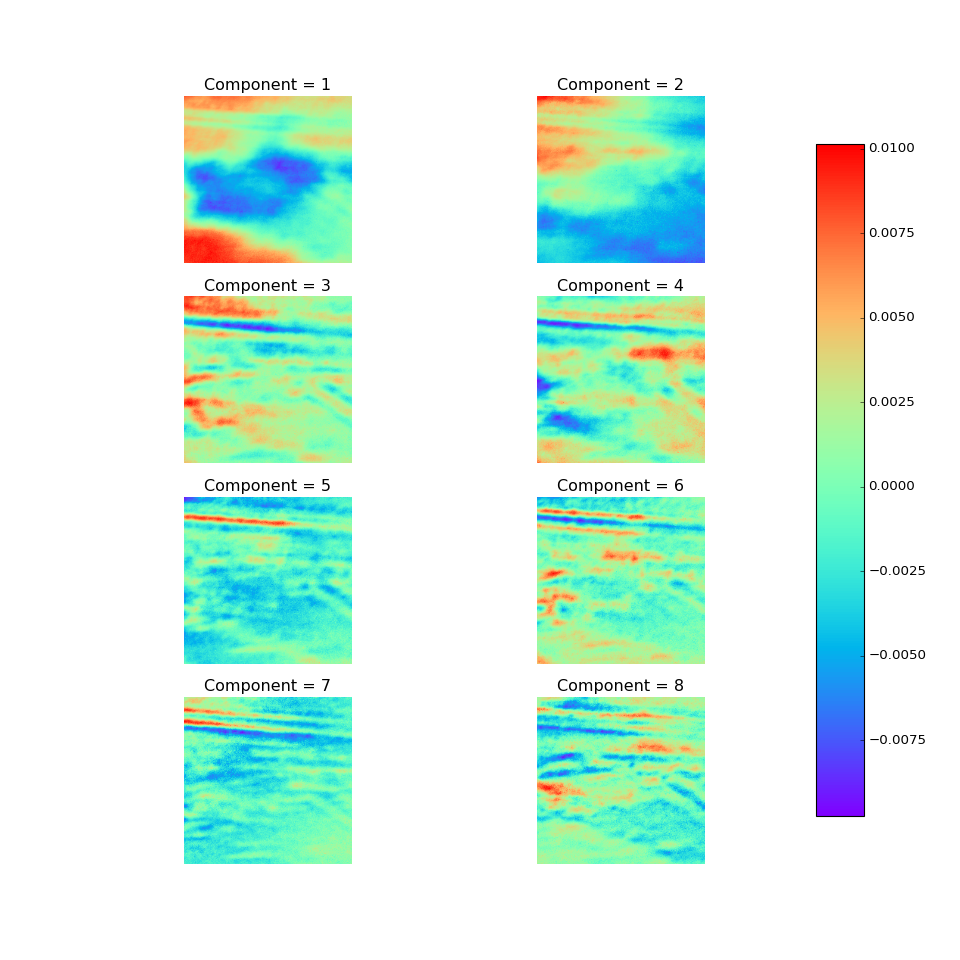

<IPython.core.display.Javascript object>


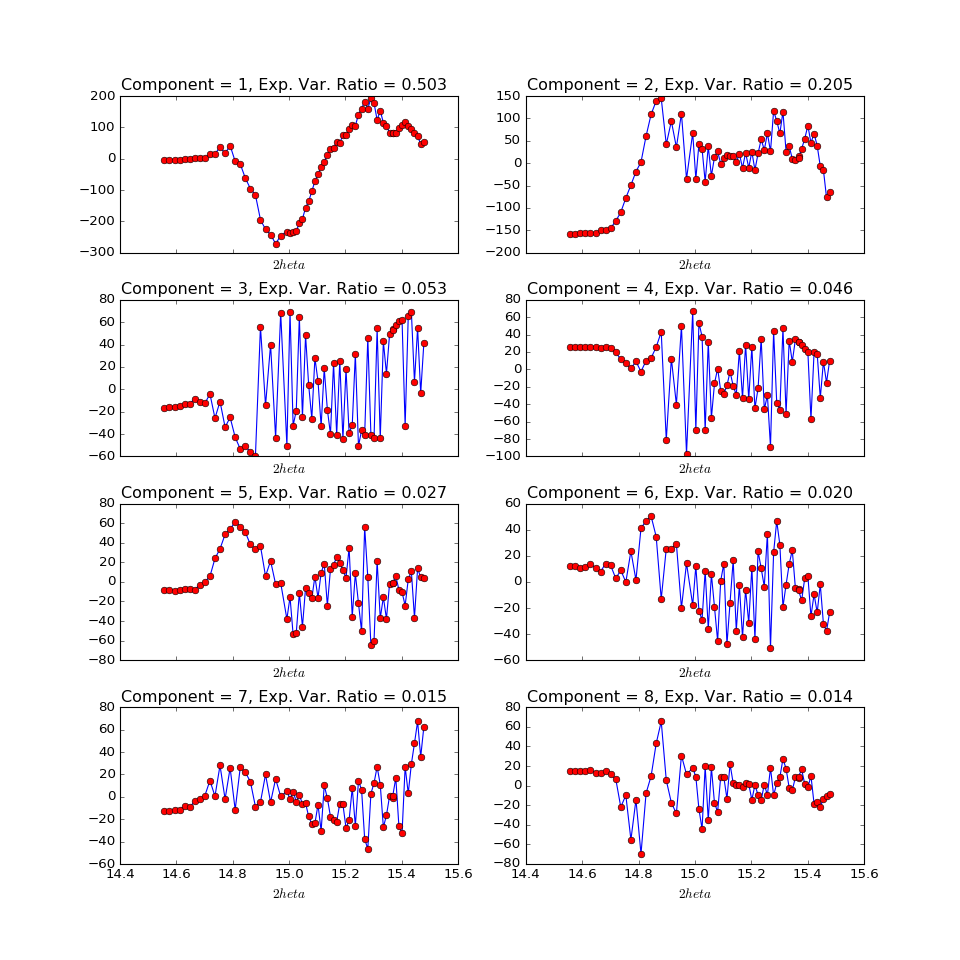

In [13]:
# set the number of principal components we want PCA to use. Try multiple numbers.
n_comp = 8
r_comp = 20
#projec, eigenvec, var_ratio, pca = doPCA(data2, n_comp, xvals=xvals,xlabel='$2\theta$',cmap='rainbow')
projec, eigenvec, var_ratio, pca = doPCA(datalog_prep, n_comp,xvals=xvals,xlabel='$2\theta$',
                                         cmap='rainbow',normalize = True, returnComponents = r_comp)

(20L, 390L, 390L)


<IPython.core.display.Javascript object>


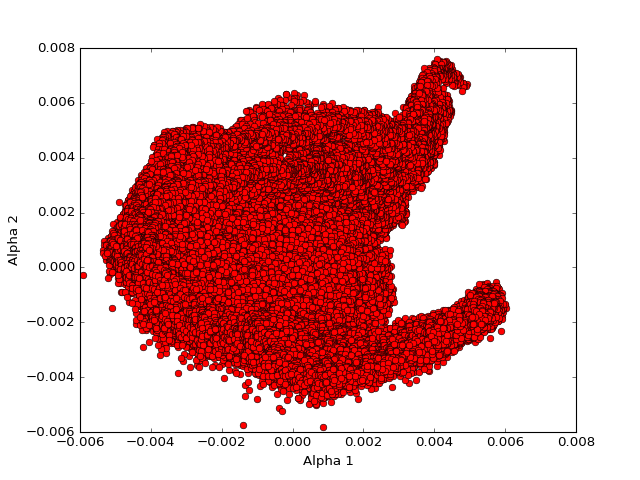

In [14]:
alphax = 1
alphay = 2

print projec.shape
alpha = projec.reshape(20,-1)

fig,ax = plt.subplots()
ax.plot(alpha[alphax-1,:],alpha[alphay-1,:],'ro')
ax.set_xlabel('Alpha ' + str(alphax))
ax.set_ylabel('Alpha ' + str(alphay))

<IPython.core.display.Javascript object>


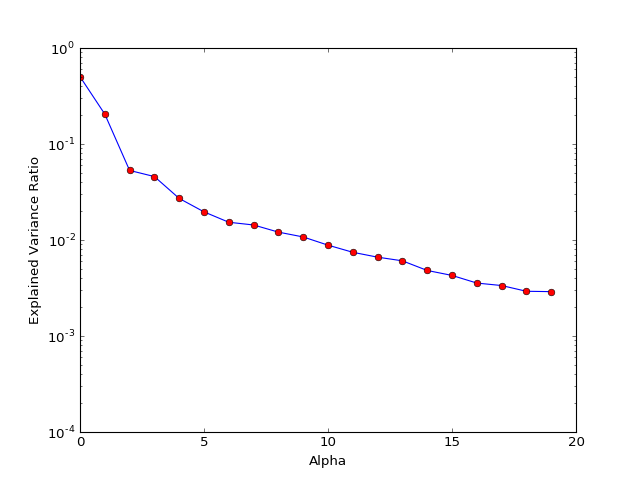

In [15]:
v = var_ratio[0]
for i in range(1,var_ratio.shape[0]):
    v = np.hstack([v,var_ratio[i]])

fig,ax = plt.subplots()
ax.plot(v,marker = 'o', markerfacecolor='r')
ax.set_xlabel('Alpha')
ax.set_xlim([0,20])
ax.set_ylabel('Explained Variance Ratio')
ax.set_ylim([0.0001,1])
ax.set_yscale("log", nonposy='clip')

nmf done
analysis done


<IPython.core.display.Javascript object>


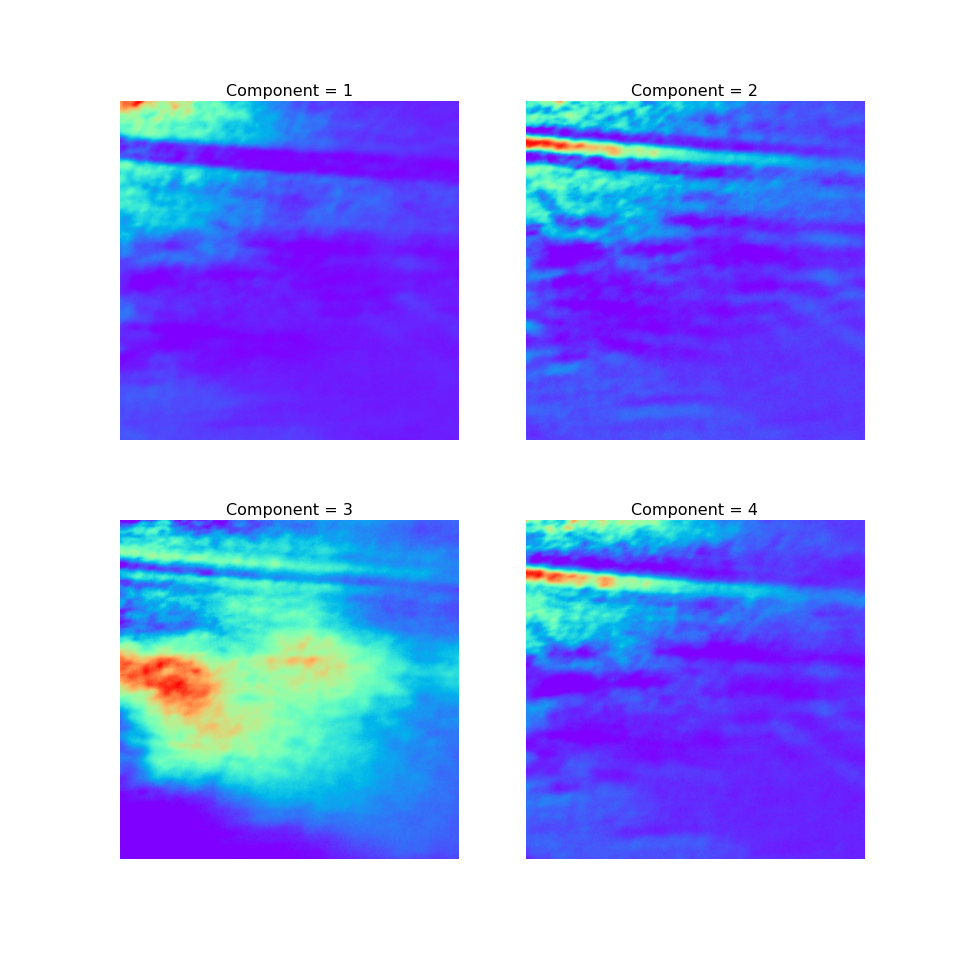

<IPython.core.display.Javascript object>


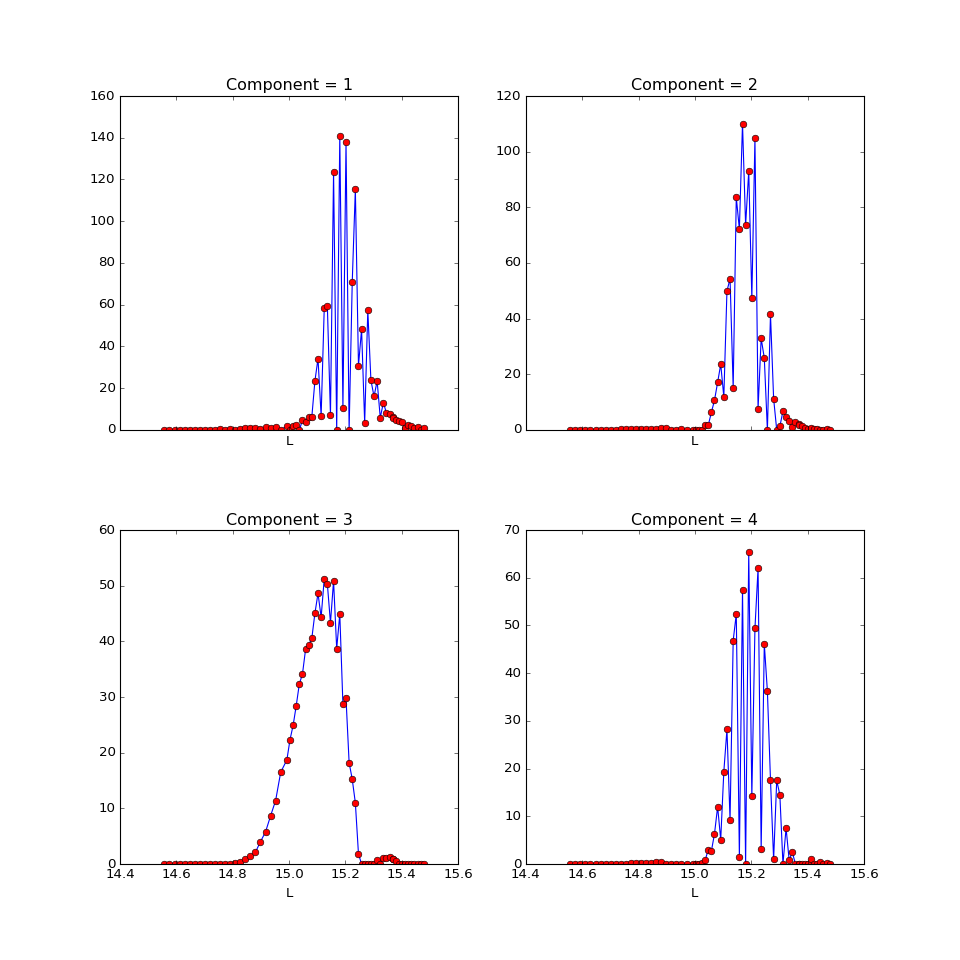

In [16]:
# Same as before, except now use NMF
n_comp = 4
projec, eigenvec, nmf = doNMF(data_prep, 4, xvals=xvals,xlabel='L',cmap='rainbow')

nmf done
analysis done


<IPython.core.display.Javascript object>


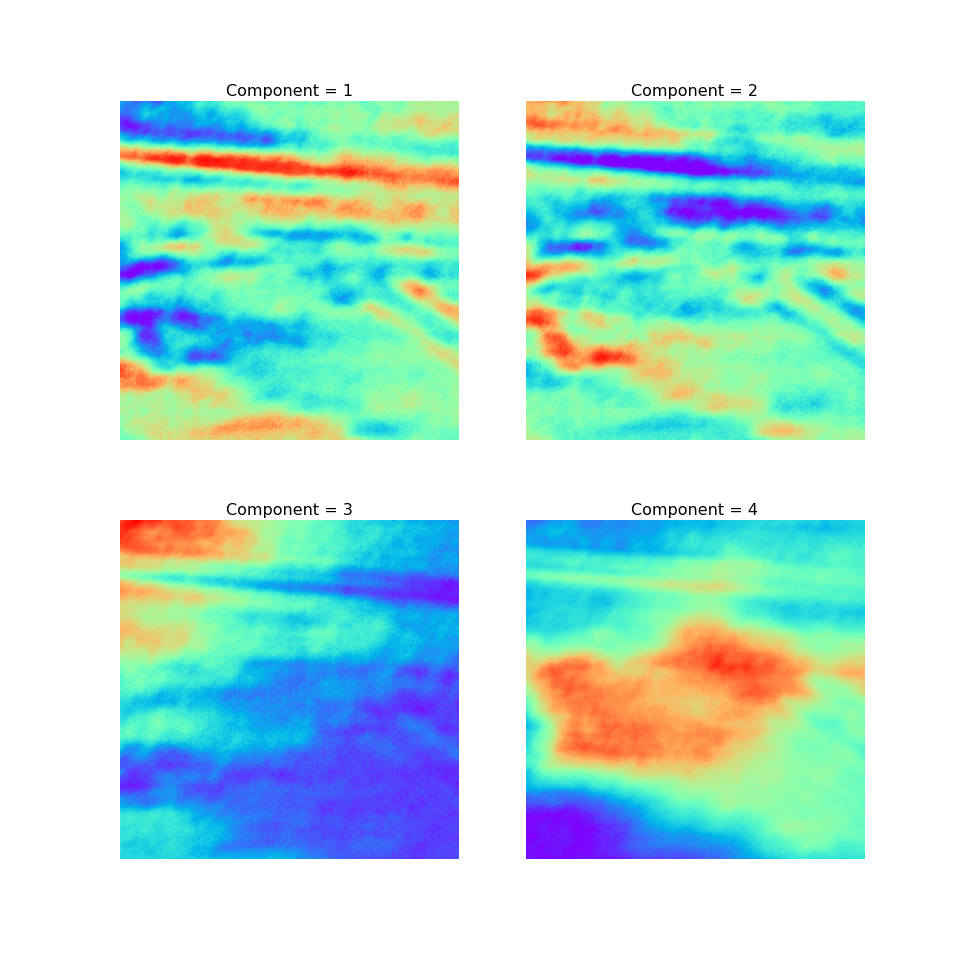

<IPython.core.display.Javascript object>


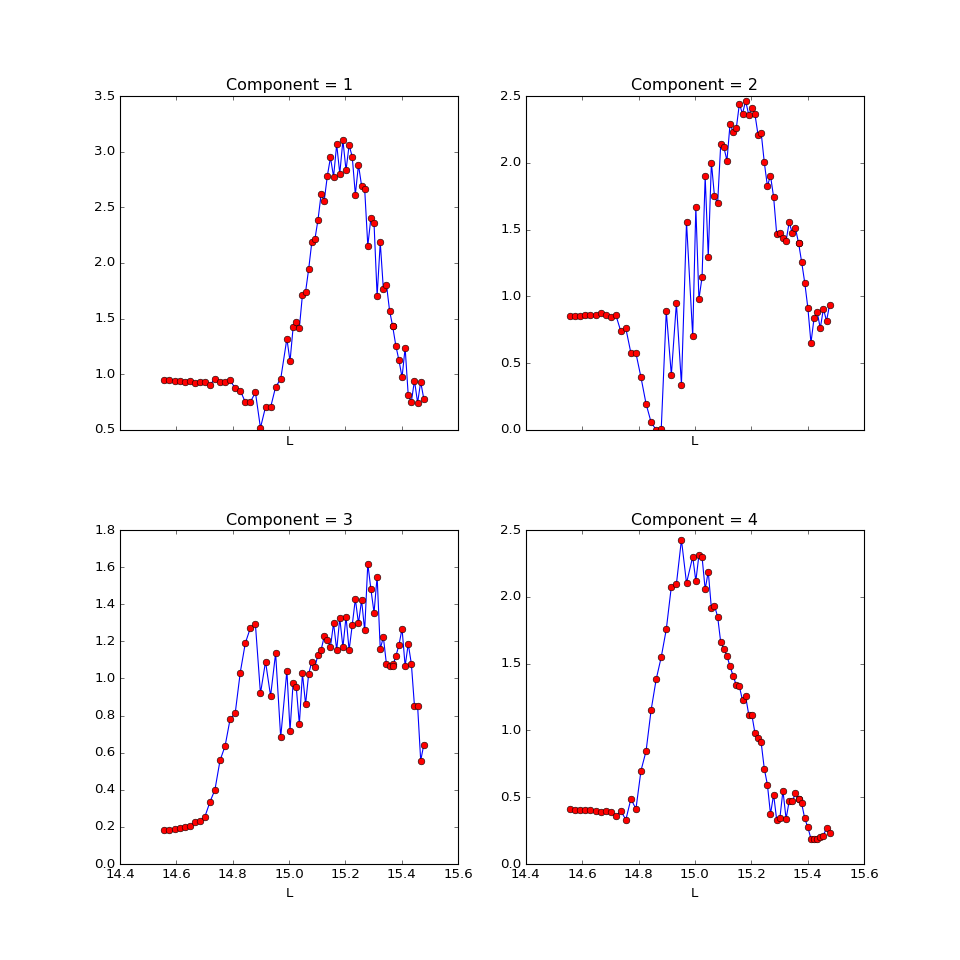

In [17]:
# Same as before, except now use NMF
n_comp = 4
projec, eigenvec, nmf = doNMF(datalog_prep, n_comp, xvals=xvals,xlabel='L',cmap='rainbow')

nmf done
analysis done


<IPython.core.display.Javascript object>


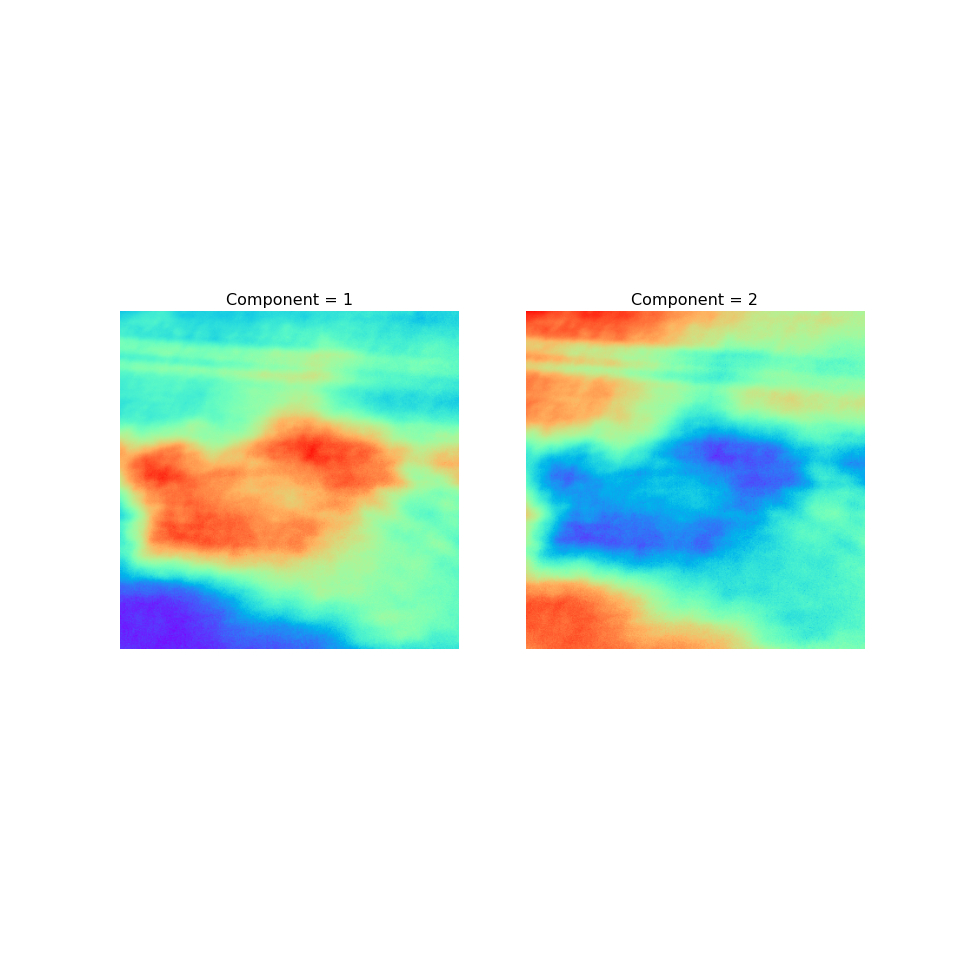

<IPython.core.display.Javascript object>


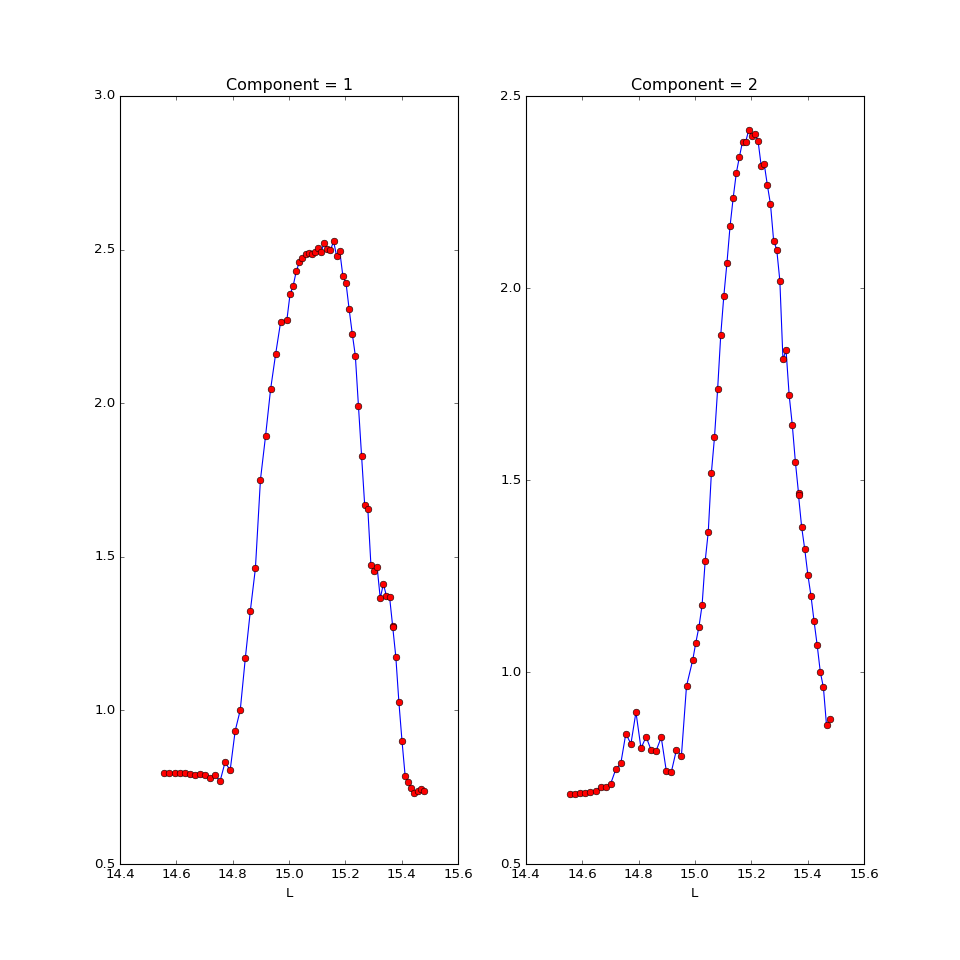

In [18]:
# Same as before, except now use NMF
n_comp = 2
projec, eigenvec, nmf = doNMF(datalog_prep, n_comp, xvals=xvals,xlabel='L',cmap='rainbow')